In [262]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_columns = 999
import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv('D:\Data\kaggle datasets\movie_IMDB.csv')

In [263]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [264]:
data.shape

(5043, 28)

In [265]:
data.columns

Index([u'color', u'director_name', u'num_critic_for_reviews', u'duration',
       u'director_facebook_likes', u'actor_3_facebook_likes', u'actor_2_name',
       u'actor_1_facebook_likes', u'gross', u'genres', u'actor_1_name',
       u'movie_title', u'num_voted_users', u'cast_total_facebook_likes',
       u'actor_3_name', u'facenumber_in_poster', u'plot_keywords',
       u'movie_imdb_link', u'num_user_for_reviews', u'language', u'country',
       u'content_rating', u'budget', u'title_year', u'actor_2_facebook_likes',
       u'imdb_score', u'aspect_ratio', u'movie_facebook_likes'],
      dtype='object')

In [266]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [267]:
numerical_features = data.select_dtypes(exclude=['object']).columns
categorical_features = data.select_dtypes(include=['object']).columns

In [268]:
num_data = data[numerical_features]

In [269]:
num_data.shape

(5043, 16)

In [270]:
num_data.isnull().sum().sort_values(ascending = False)

gross                        884
budget                       492
aspect_ratio                 329
title_year                   108
director_facebook_likes      104
num_critic_for_reviews        50
actor_3_facebook_likes        23
num_user_for_reviews          21
duration                      15
actor_2_facebook_likes        13
facenumber_in_poster          13
actor_1_facebook_likes         7
movie_facebook_likes           0
imdb_score                     0
cast_total_facebook_likes      0
num_voted_users                0
dtype: int64

In [271]:
num_data.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,NaN,131.0,NaN,131.0,NaN,8,143,0.0,NaN,NaN,NaN,12.0,7.1,NaN,0


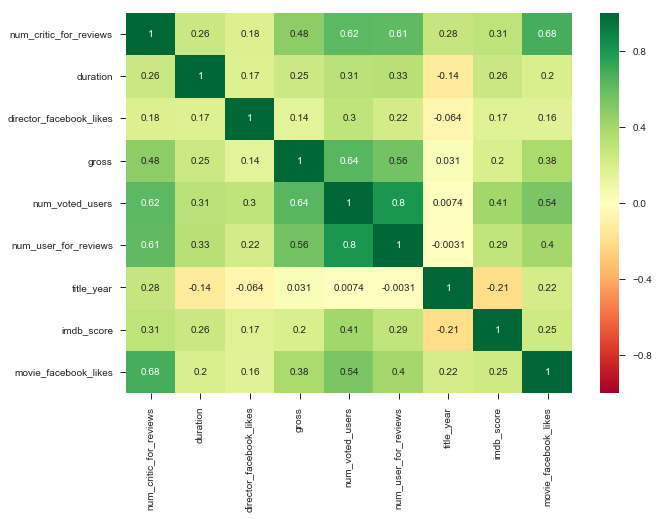

In [272]:
# most correlated features
import seaborn as sns
corrmat = num_data.corr()
plt.figure(figsize = (10,7))
# or fig, ax = plt.subplots(figsize=(20, 10))
top_corr_features = corrmat.index[abs(corrmat["imdb_score"])>0.1]
g = sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
#g = sns.heatmap(corrmat,annot=True,cmap="RdYlGn")

In [273]:
corrmat.index[abs(corrmat['imdb_score']) > 0.1].tolist()

['num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'gross',
 'num_voted_users',
 'num_user_for_reviews',
 'title_year',
 'imdb_score',
 'movie_facebook_likes']

In [274]:
# num_data = num_data[['num_critic_for_reviews',
#  'duration',
#  'gross',
#  'num_voted_users',
#  'imdb_score',
#  'movie_facebook_likes']]

In [275]:
num_data.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,NaN,131.0,NaN,131.0,NaN,8,143,0.0,NaN,NaN,NaN,12.0,7.1,NaN,0


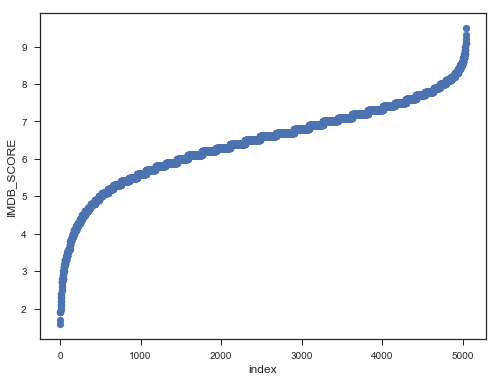

In [276]:
plt.figure(figsize=(8,6))
plt.scatter(range(num_data.shape[0]), np.sort(num_data.imdb_score.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('IMDB_SCORE', fontsize=12)
plt.show()

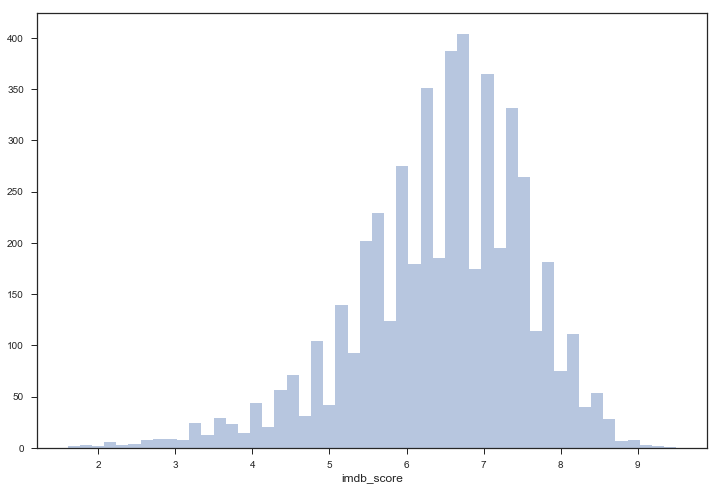

In [277]:
plt.figure(figsize=(12,8))
sns.distplot(num_data.imdb_score.values, bins=50, kde=False)
plt.xlabel('imdb_score', fontsize=12)
plt.show()

In [278]:
num_data.columns.tolist()

['num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'gross',
 'num_voted_users',
 'cast_total_facebook_likes',
 'facenumber_in_poster',
 'num_user_for_reviews',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

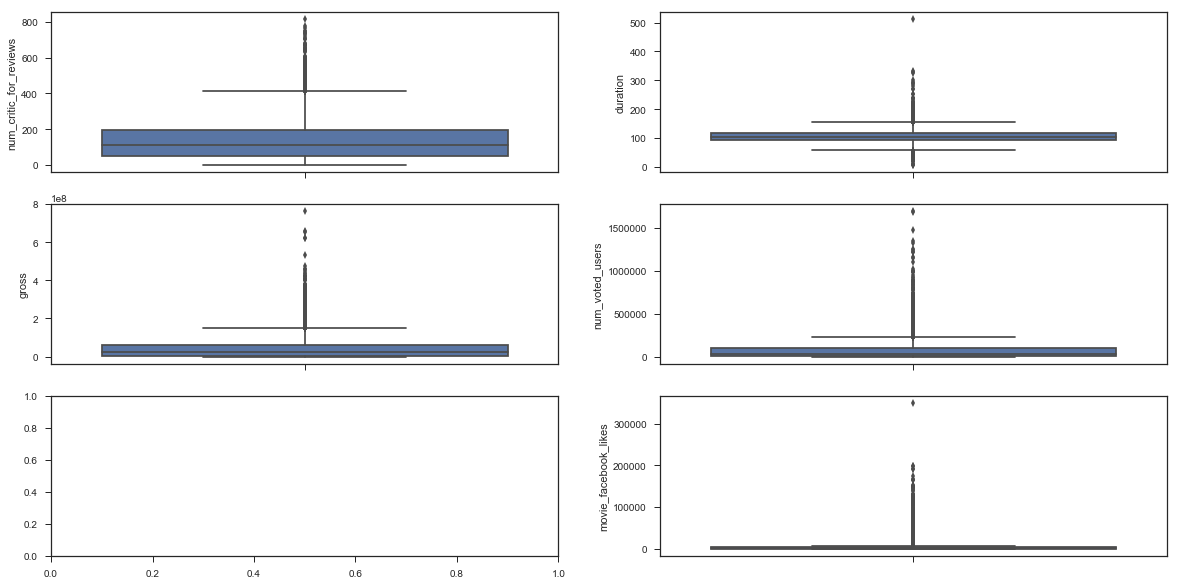

In [279]:
fig, ax = plt.subplots(figsize=(20,10), ncols=2, nrows=3)
sns.set_style("whitegrid")
#sns.boxplot(x="imdb_score", data=num_data,orient = 'v',ax = ax[0][0])
sns.boxplot(x="num_critic_for_reviews", data=num_data,orient = 'v',ax = ax[0][0])
sns.boxplot(x="duration", data=num_data,orient = 'v',ax = ax[0][1])
#sns.boxplot(x="director_facebook_likes", data=num_data,orient = 'v',ax = ax[1][0])
sns.boxplot(x="gross", data=num_data,orient = 'v',ax = ax[1][0])
sns.boxplot(x="num_voted_users", data=num_data,orient = 'v',ax = ax[1][1])
#sns.boxplot(x="num_user_for_reviews", data=num_data,orient = 'v',ax = ax[2][0])
#sns.boxplot(x="title_year", data=num_data,orient = 'v',ax = ax[2][1])
sns.boxplot(x="movie_facebook_likes", data=num_data,orient = 'v',ax = ax[2][1])


In [280]:
num_data.isnull().sum().sort_values(ascending = False)

gross                        884
budget                       492
aspect_ratio                 329
title_year                   108
director_facebook_likes      104
num_critic_for_reviews        50
actor_3_facebook_likes        23
num_user_for_reviews          21
duration                      15
actor_2_facebook_likes        13
facenumber_in_poster          13
actor_1_facebook_likes         7
movie_facebook_likes           0
imdb_score                     0
cast_total_facebook_likes      0
num_voted_users                0
dtype: int64

In [281]:
# from pandas.plotting import scatter_matrix
# scatter_matrix(num_data, alpha=0.2, figsize=(10, 10), diagonal='kde')

In [282]:
num_data.median()

num_critic_for_reviews            110.00
duration                          103.00
director_facebook_likes            49.00
actor_3_facebook_likes            371.50
actor_1_facebook_likes            988.00
gross                        25517500.00
num_voted_users                 34359.00
cast_total_facebook_likes        3090.00
facenumber_in_poster                1.00
num_user_for_reviews              156.00
budget                       20000000.00
title_year                       2005.00
actor_2_facebook_likes            595.00
imdb_score                          6.60
aspect_ratio                        2.35
movie_facebook_likes              166.00
dtype: float64

## Imputing NaN with Median (Because data has outliers)

In [283]:
num_data.fillna(num_data.median(),inplace = True)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,110.0,103.0,131.0,371.5,131.0,25517500.0,8,143,0.0,156.0,20000000.0,2005.0,12.0,7.1,2.35,0
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000
6,392.0,156.0,0.0,4000.0,24000.0,336530303.0,383056,46055,0.0,1902.0,258000000.0,2007.0,11000.0,6.2,2.35,0
7,324.0,100.0,15.0,284.0,799.0,200807262.0,294810,2036,1.0,387.0,260000000.0,2010.0,553.0,7.8,1.85,29000
8,635.0,141.0,0.0,19000.0,26000.0,458991599.0,462669,92000,4.0,1117.0,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,375.0,153.0,282.0,10000.0,25000.0,301956980.0,321795,58753,3.0,973.0,250000000.0,2009.0,11000.0,7.5,2.35,10000


# Outliers

In [284]:
import numpy as np

def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1)
    upper_bound = quartile_3 + (iqr * 1)
    return np.where((ys > upper_bound) | (ys < lower_bound))

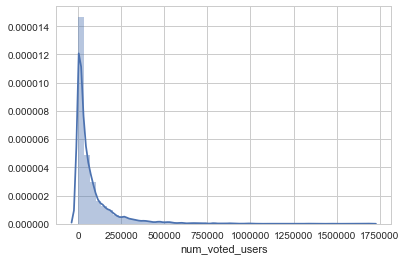

In [285]:
sns.distplot(num_data['num_voted_users'])

In [286]:
# test = outliers_iqr(num_data['num_voted_users'])

# # c=np.intersect1d(num_data.index.values,test)

# c=np.setxor1d(num_data.index.values,test)

# c.size

# num_data_filtered = num_data.loc[c]

# num_data_filtered.shape

# sns.distplot(num_data_filtered['num_voted_users'])

In [287]:
num_data.isnull().any()

num_critic_for_reviews       False
duration                     False
director_facebook_likes      False
actor_3_facebook_likes       False
actor_1_facebook_likes       False
gross                        False
num_voted_users              False
cast_total_facebook_likes    False
facenumber_in_poster         False
num_user_for_reviews         False
budget                       False
title_year                   False
actor_2_facebook_likes       False
imdb_score                   False
aspect_ratio                 False
movie_facebook_likes         False
dtype: bool

In [288]:
# num_data_filtered.head()

In [289]:
target = num_data['imdb_score']
num_data.drop(['imdb_score'],inplace = True,axis = 1)

# Skewness

In [290]:
from scipy.stats import skew 
skewness = num_data.apply(lambda x: skew(x.dropna()))
skewness = skewness[abs(skewness) > 0.5]
skewness.index

Index([u'num_critic_for_reviews', u'duration', u'director_facebook_likes',
       u'actor_3_facebook_likes', u'actor_1_facebook_likes', u'gross',
       u'num_voted_users', u'cast_total_facebook_likes',
       u'facenumber_in_poster', u'num_user_for_reviews', u'budget',
       u'title_year', u'actor_2_facebook_likes', u'aspect_ratio',
       u'movie_facebook_likes'],
      dtype='object')

In [291]:
skew_features = num_data[skewness.index]
skew_features  = np.log1p(skew_features)
num_data[skewness.index] = skew_features

In [292]:
num_data.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes
0,6.584791,5.187386,0.000000,6.752270,6.908755,20.449494,13.694704,8.483636,0.000000,8.024535,19.283571,7.605890,6.842683,1.022451,10.404293
1,5.713733,5.135798,6.335054,6.908755,10.596660,19.550159,13.063082,10.786242,0.000000,7.122060,19.519293,7.604894,8.517393,1.208960,0.000000
2,6.401917,5.003946,0.000000,5.087596,9.305741,19.114199,12.527681,9.367430,0.693147,6.902743,19.316769,7.608871,5.976351,1.208960,11.350418
3,6.701960,5.105945,9.998843,10.043293,10.203629,19.920595,13.950337,11.578339,0.000000,7.901748,19.336971,7.607381,10.043293,1.208960,12.007628
4,4.709530,4.644391,4.882802,5.920237,4.882802,17.054875,2.197225,4.969813,0.000000,5.056246,16.811243,7.603898,2.564949,1.208960,0.000000


In [293]:
from sklearn.model_selection import train_test_split # to split the data into two parts
X_train,X_test,y_train,y_test = train_test_split(num_data,target, random_state = 0) # test_size = 0.10

## Random Forest Regressor

In [295]:
from sklearn.ensemble import RandomForestRegressor
dt = RandomForestRegressor(n_estimators = 1000,n_jobs=-1,random_state = 0)
dt.fit(X_train, y_train)
dt_score_train = dt.score(X_train, y_train)
print("Training score: ",dt_score_train)
dt_score_test = dt.score(X_test, y_test)
print("Testing score: ",dt_score_test)

('Training score: ', 0.93218918063533396)
('Testing score: ', 0.50901764280146666)


### Numerical Feature Importance

In [327]:
df = pd.DataFrame(data = dt.feature_importances_,index = num_data.columns.tolist())

df = df[df.iloc[:,0] > 0].sort_values(by = 0,ascending = False)
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(y = df.index, x= df[0])

ValueError: Shape of passed values is (1, 263), indices imply (1, 15)

#### looks like number of voter users and duration has lot to say about imdb_score

In [297]:
imp_features = df.iloc[:4,0].index
num_data_new = num_data[imp_features]

In [298]:
num_data_new.head()

,num_voted_users,duration,budget,gross
0,13.694704,5.187386,19.283571,20.449494
1,13.063082,5.135798,19.519293,19.550159
2,12.527681,5.003946,19.316769,19.114199
3,13.950337,5.105945,19.336971,19.920595
4,2.197225,4.644391,16.811243,17.054875


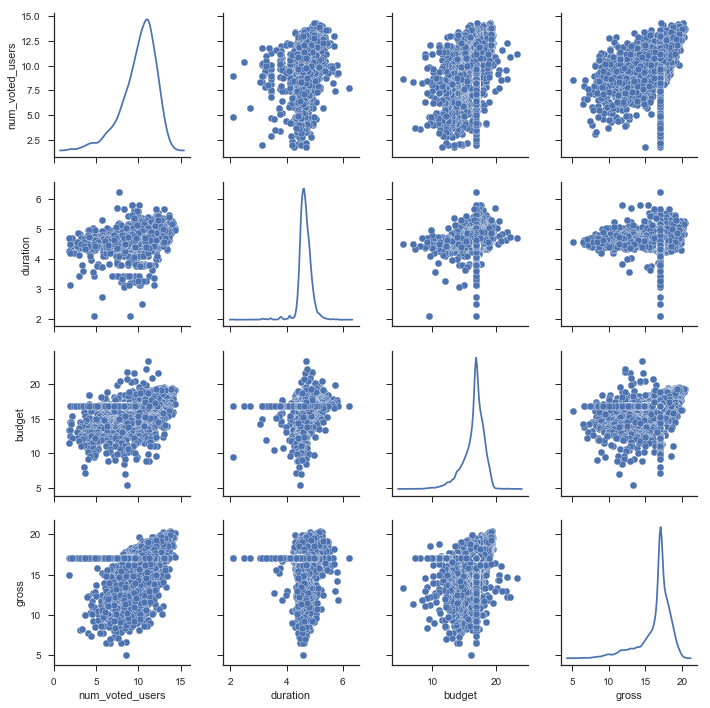

In [299]:
sns.set(style="ticks")
sns.pairplot(num_data_new,diag_kind="kde")

In [300]:
categorical_features

Index([u'color', u'director_name', u'actor_2_name', u'genres', u'actor_1_name',
       u'movie_title', u'actor_3_name', u'plot_keywords', u'movie_imdb_link',
       u'language', u'country', u'content_rating'],
      dtype='object')

In [301]:
cat_data = data[categorical_features]

In [302]:
cat_data.head()

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
0,Color,James Cameron,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,Wes Studi,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,English,USA,PG-13
1,Color,Gore Verbinski,Orlando Bloom,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,Jack Davenport,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,English,USA,PG-13
2,Color,Sam Mendes,Rory Kinnear,Action|Adventure|Thriller,Christoph Waltz,Spectre,Stephanie Sigman,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,English,UK,PG-13
3,Color,Christopher Nolan,Christian Bale,Action|Thriller,Tom Hardy,The Dark Knight Rises,Joseph Gordon-Levitt,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,English,USA,PG-13
4,NaN,Doug Walker,Rob Walker,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN


In [303]:
cat_data.isnull().sum().sort_values(ascending = False)

content_rating     303
plot_keywords      153
director_name      104
actor_3_name        23
color               19
actor_2_name        13
language            12
actor_1_name         7
country              5
movie_imdb_link      0
movie_title          0
genres               0
dtype: int64

### Filling NaN values in Categorical Features with Mode

In [304]:
# from sklearn.preprocessing import Imputer
# imr = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
# imr = imr.fit(cat_data)
# cat_data = imr.transform(cat_data.values)
cat_data.fillna(cat_data.mode(),inplace = True)

In [305]:
cat_data.isnull().any()

color               True
director_name       True
actor_2_name        True
genres             False
actor_1_name        True
movie_title        False
actor_3_name        True
plot_keywords       True
movie_imdb_link    False
language            True
country             True
content_rating      True
dtype: bool

In [306]:
cat_data.fillna(value = 'NULL',inplace = True)

In [307]:
cat_data.isnull().any()

color              False
director_name      False
actor_2_name       False
genres             False
actor_1_name       False
movie_title        False
actor_3_name       False
plot_keywords      False
movie_imdb_link    False
language           False
country            False
content_rating     False
dtype: bool

In [308]:
df_genres = pd.DataFrame(cat_data['genres'])
df_genres = pd.DataFrame(df_genres.genres.str.split('|').tolist(),columns = ["Genre_"+str(i) for i in  range(0,8)] )
cat_data.drop('genres',inplace = True, axis = 1)
cat_data = cat_data.merge(df_genres,left_index = True,right_index = True)

In [309]:
df_genres = pd.DataFrame(cat_data['plot_keywords'])
df_genres = pd.DataFrame(df_genres.plot_keywords.str.split('|').tolist(),columns = ["plot_keywords_"+str(i) for i in  range(0,5)] )
cat_data.drop('plot_keywords',inplace = True, axis = 1)
cat_data = cat_data.merge(df_genres,left_index = True,right_index = True)

In [310]:
cat_data.head()

,color,director_name,actor_2_name,actor_1_name,movie_title,actor_3_name,movie_imdb_link,language,country,content_rating,Genre_0,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,Genre_6,Genre_7,plot_keywords_0,plot_keywords_1,plot_keywords_2,plot_keywords_3,plot_keywords_4
0,Color,James Cameron,Joel David Moore,CCH Pounder,Avatar,Wes Studi,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,English,USA,PG-13,Action,Adventure,Fantasy,Sci-Fi,None,None,None,None,avatar,future,marine,native,paraplegic
1,Color,Gore Verbinski,Orlando Bloom,Johnny Depp,Pirates of the Caribbean: At World's End,Jack Davenport,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,English,USA,PG-13,Action,Adventure,Fantasy,None,None,None,None,None,goddess,marriage ceremony,marriage proposal,pirate,singapore
2,Color,Sam Mendes,Rory Kinnear,Christoph Waltz,Spectre,Stephanie Sigman,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,English,UK,PG-13,Action,Adventure,Thriller,None,None,None,None,None,bomb,espionage,sequel,spy,terrorist
3,Color,Christopher Nolan,Christian Bale,Tom Hardy,The Dark Knight Rises,Joseph Gordon-Levitt,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,English,USA,PG-13,Action,Thriller,None,None,None,None,None,None,deception,imprisonment,lawlessness,police officer,terrorist plot
4,NULL,Doug Walker,Rob Walker,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,NULL,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NULL,NULL,NULL,Documentary,None,None,None,None,None,None,None,NULL,None,None,None,None


In [311]:
cat_data.drop(['movie_imdb_link','Genre_6','Genre_7'],inplace = True, axis = 1)

In [312]:
cat_data.nunique().sort_values()

color                 3
Genre_5              11
Genre_4              16
Genre_3              17
content_rating       19
Genre_0              21
Genre_2              23
Genre_1              24
language             48
country              66
plot_keywords_0    2064
actor_1_name       2098
plot_keywords_4    2228
director_name      2399
plot_keywords_1    2434
plot_keywords_3    2449
plot_keywords_2    2560
actor_2_name       3033
actor_3_name       3522
movie_title        4917
dtype: int64

In [313]:
cat_data = cat_data.loc[:,['color',
 'Genre_5',
 'Genre_4',
 'Genre_3',
 'content_rating',
 'Genre_0',
 'Genre_2',
 'Genre_1',
 'language',
 'country']]

In [314]:
cat_data.head()

,color,Genre_5,Genre_4,Genre_3,content_rating,Genre_0,Genre_2,Genre_1,language,country
0,Color,None,None,Sci-Fi,PG-13,Action,Fantasy,Adventure,English,USA
1,Color,None,None,None,PG-13,Action,Fantasy,Adventure,English,USA
2,Color,None,None,None,PG-13,Action,Thriller,Adventure,English,UK
3,Color,None,None,None,PG-13,Action,None,Thriller,English,USA
4,NULL,None,None,None,NULL,Documentary,None,None,NULL,NULL


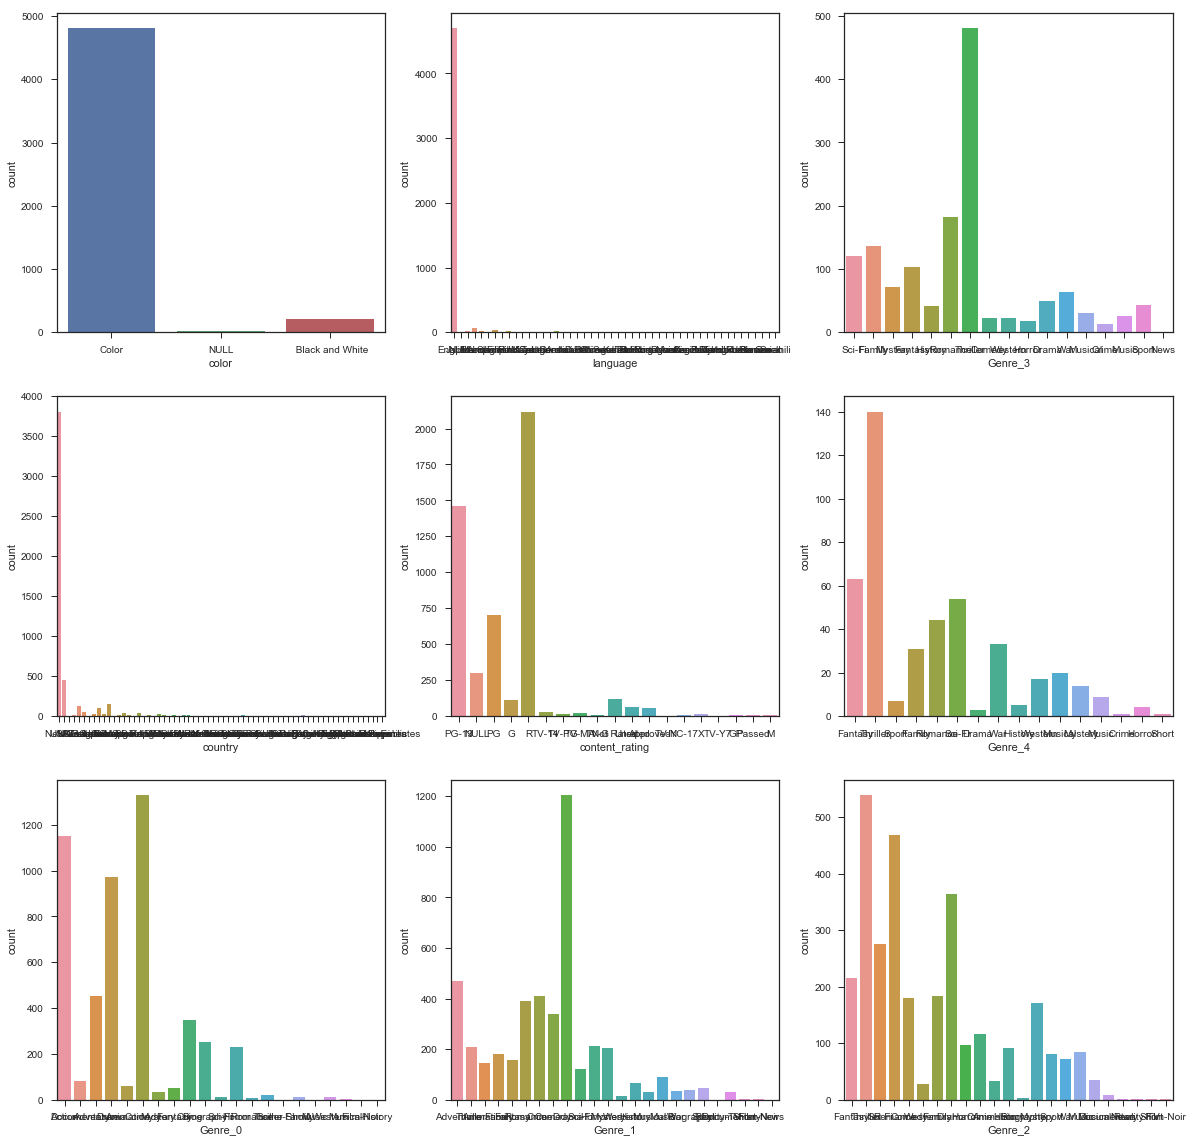

In [315]:
fig, ax = plt.subplots(figsize=(20,20), ncols=3, nrows=3)
sns.countplot(data = cat_data, x= 'color', ax = ax[0][0])
sns.countplot(data = cat_data, x= 'language', ax = ax[0][1])
sns.countplot(data = cat_data, x= 'country', ax = ax[1][0])
sns.countplot(data = cat_data, x= 'content_rating', ax = ax[1][1])
sns.countplot(data = cat_data, x= 'Genre_0', ax = ax[2][0])
sns.countplot(data = cat_data, x= 'Genre_1', ax = ax[2][1])
sns.countplot(data = cat_data, x= 'Genre_2', ax = ax[2][2])
sns.countplot(data = cat_data, x= 'Genre_3', ax = ax[0][2])
sns.countplot(data = cat_data, x= 'Genre_4', ax = ax[1][2])
# sns.countplot(data = cat_data, x= 'Genre_5', ax = ax[1][1])

In [316]:
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# pca = PCA(n_components=None, svd_solver="full")
# pca.fit(StandardScaler().fit_transform(num_data))
# # X_train = pca.transform(X_train)
# # pca_data = pca.transform(num_data)
# cum_var_exp = np.cumsum(pca.explained_variance_ratio_)

In [317]:
cat_data = pd.get_dummies(cat_data)

In [318]:
merged = pd.concat([num_data,cat_data], axis =1)

In [319]:
merged.shape

(5043, 263)

In [320]:
from sklearn.model_selection import train_test_split # to split the data into two parts
X_train,X_test,y_train,y_test = train_test_split(merged,target, random_state = 0,test_size = 0.15)

In [321]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


#lasso = Lasso(random_state=0)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{'alpha': alphas}]
n_folds = 3
lasso_cv = LassoCV(alphas=alphas, random_state=0)
# lasso_cv = Lasso(alpha = 0.001)
lasso_cv.fit(X_train, y_train)
lasso_cv.score(X_test, y_test)
#lasso_cv.predict(X_test)

0.45552105034804807

In [322]:
#decision tree
from sklearn.ensemble import RandomForestRegressor
dt = RandomForestRegressor()
dt.fit(X_train, y_train)
dt_score_train = dt.score(X_train, y_train)
print("Training score: ",dt_score_train)
dt_score_test = dt.score(X_test, y_test)
print("Testing score: ",dt_score_test)

('Training score: ', 0.90810082795555336)
('Testing score: ', 0.5254759541151095)


In [323]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 90).fit(X_train)
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# # plt.xlim(0,7,1)
# plt.xlabel('Number of components')
# plt.ylabel('Cumulative explained variance')

In [324]:
# np.cumsum(pca.explained_variance_ratio_)

In [325]:
# X_train_pca = pca.transform(X_train)
# X_test_pca = pca.transform(X_test)

In [326]:
# plt.scatter(y_test, y_test_ - y_test, c = "blue",  label = "Training data")
# #plt.scatter(y_test_rdg,y_test_rdg - y_test, c = "green",  label = "Validation data")
# plt.title("Linear regression")
# plt.xlabel("Predicted values")
# plt.ylabel("Residuals")
# plt.legend(loc = "upper left")
# plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
# plt.show()